# Airbnb Rental Price Prediction using PyTorch

#### Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
#### Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
#### Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

#### Task Details

As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading CSV data using pandas for cleaning

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Checking for null or empty values

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For entries with no name just giving dummy name. Since more than enough data is missing we drop review columns

In [5]:
df.fillna({"name": "noname", "host_name": "noname"}, axis=0, inplace=True)

In [6]:
df.drop(["last_review", "reviews_per_month"], axis=1, inplace=True)

In [7]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Checking datat types of each column

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

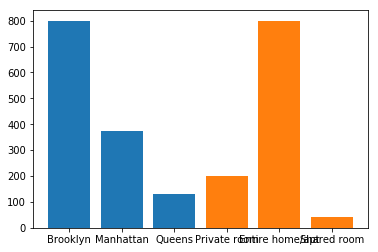

In [10]:
plt.figure()
plt.bar(df.neighbourhood_group[:100], df.price[:100])
plt.bar(df.room_type[:100], df.price[:100])
plt.show()

In [11]:
df.shape

(48895, 14)

In [12]:
df1 = df.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

In [13]:
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [18]:
import numpy as np

In [48]:
df1['x'] = np.cos(df1['latitude'], dtype=np.float64) * np.cos(df1['longitude'], dtype=np.float64)
df1['y'] = np.cos(df1['latitude'], dtype=np.float64) * np.sin(df1['longitude'], dtype=np.float64)
df1['z'] = np.sin(df1['latitude'], dtype=np.float64)

In [49]:
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,-0.141748,-0.971101,0.192015
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,-0.155116,-0.984060,0.086974
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,-0.114165,-0.992957,0.031679
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,-0.130353,-0.979287,0.154938
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,-0.116195,-0.992330,0.042182


In [50]:
df2 = pd.get_dummies(data=df1, prefix=['ngp', 'ng', 'rt'], columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [51]:
df2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,40.64749,-73.97237,149,1,9,6,365,-0.141748,-0.971101,0.192015,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,-0.155116,-0.984060,0.086974,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,150,3,0,1,365,-0.114165,-0.992957,0.031679,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,-0.130353,-0.979287,0.154938,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,1,0,-0.116195,-0.992330,0.042182,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df3 = df2.drop(['latitude', 'longitude'], axis=1)

In [53]:
df3.shape

(48895, 234)

In [54]:
X = df3.drop(['price'], axis=1)
y = df3[['price']]

In [55]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,ngp_Brooklyn,ngp_Manhattan,ngp_Queens,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,1,9,6,365,-0.141748,-0.971101,0.192015,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,45,2,355,-0.155116,-0.984060,0.086974,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,365,-0.114165,-0.992957,0.031679,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,270,1,194,-0.130353,-0.979287,0.154938,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,9,1,0,-0.116195,-0.992330,0.042182,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn import preprocessing

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()

In [58]:
x = X[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
x_scaled = min_max_scaler.fit_transform(x)
newX = pd.DataFrame(x_scaled)

In [59]:
X[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = newX

In [60]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,ngp_Brooklyn,ngp_Manhattan,ngp_Queens,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,0.000000,0.014308,0.015337,1.000000,-0.141748,-0.971101,0.192015,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.071542,0.003067,0.972603,-0.155116,-0.984060,0.086974,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.001601,0.000000,0.000000,1.000000,-0.114165,-0.992957,0.031679,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.429253,0.000000,0.531507,-0.130353,-0.979287,0.154938,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.007206,0.014308,0.000000,0.000000,-0.116195,-0.992330,0.042182,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_scaler = preprocessing.MinMaxScaler()

In [62]:
y_scaled = y_scaler.fit_transform(y)
newy = pd.DataFrame(y_scaled, columns=['price'])
newy.head()

,price
0,0.0149
1,0.0225
2,0.0150
3,0.0089
4,0.0080


In [63]:
y = newy

In [64]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F
import torch.nn as nn

In [65]:
dft = TensorDataset(torch.tensor(X.values, dtype=torch.float32), torch.tensor(y.values, dtype=torch.float32))

In [66]:
X.iloc[0]

minimum_nights                    0.000000
number_of_reviews                 0.014308
calculated_host_listings_count    0.015337
availability_365                  1.000000
x                                -0.141748
                                    ...   
ng_Woodlawn                       0.000000
ng_Woodrow                        0.000000
ng_Woodside                       0.000000
rt_Private room                   1.000000
rt_Shared room                    0.000000
Name: 0, Length: 233, dtype: float64

In [67]:
per = 0.7
train_len = int(len(dft)*per)
val_len = len(dft) - train_len

In [68]:
train_ds, val_ds = random_split(dft, [train_len, val_len])

In [69]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [70]:
input_size = X.shape[1]
output_size = 1

In [71]:
input_size

233

In [72]:
def evaluate(model, train_loader, val_loader):
    outputs_t = [model.validation_step(batch) for batch in train_loader]
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs_t, outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, train_loader, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [73]:
class AirbnbModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
#         self.linear1 = nn.Linear(64, 128)
        self.drop = nn.Dropout(p=0.2)
        self.linear3 = nn.Linear(64, output_size)
        
    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.drop(out)
        out = self.linear3(out)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs_t, outputs):
        batch_losses_t = [x['val_loss'] for x in outputs_t]
        epoch_loss_t = torch.stack(batch_losses_t).mean()   # Combine losses
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'train_loss': epoch_loss_t.item(), 'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = AirbnbModel()

In [74]:
history = [evaluate(model, train_loader, val_loader)]
history

[{'train_loss': 0.004101571161299944, 'val_loss': 0.004097052849829197}]

In [75]:
history = fit(10, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0006
Epoch [1], val_loss: 0.0006
Epoch [2], val_loss: 0.0006
Epoch [3], val_loss: 0.0006
Epoch [4], val_loss: 0.0006
Epoch [5], val_loss: 0.0006
Epoch [6], val_loss: 0.0006
Epoch [7], val_loss: 0.0006
Epoch [8], val_loss: 0.0006
Epoch [9], val_loss: 0.0005


In [76]:
history = fit(10, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0005
Epoch [1], val_loss: 0.0005
Epoch [2], val_loss: 0.0005
Epoch [3], val_loss: 0.0005
Epoch [4], val_loss: 0.0005
Epoch [5], val_loss: 0.0005
Epoch [6], val_loss: 0.0005
Epoch [7], val_loss: 0.0005
Epoch [8], val_loss: 0.0005
Epoch [9], val_loss: 0.0005


In [77]:
evaluate(model, train_loader, val_loader)

{'train_loss': 0.0005387322162277997, 'val_loss': 0.0005452777841128409}

In [78]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [79]:
tar = []
pre = []
for i in range(100):
    x, target = val_ds[i]
    pred = predict_single(x, model)
    # print("Input: ", x)
    data = y_scaler.inverse_transform(np.array([target.item(), pred]).reshape(-1, 1)).tolist()
    tar.append(data[0][0])
    pre.append(data[1][0])

In [80]:
x_axis = np.arange(0, 100, 1)

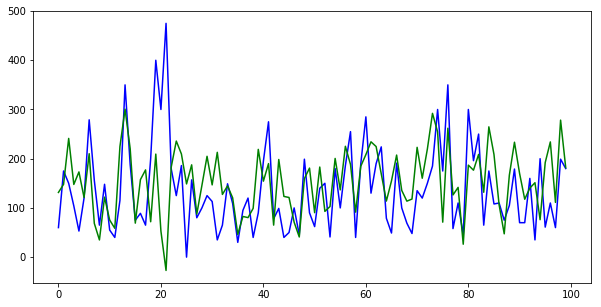

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(x_axis, tar, 'b')
plt.plot(x_axis, pre, 'g')
plt.show()

In [82]:
def predict(i):
    x, target = val_ds[i]
    pred = predict_single(x, model)
    # print("Input: ", x)
    data = y_scaler.inverse_transform(np.array([target.item(), pred]).reshape(-1, 1)).tolist()
    print("Target: ", data[0][0])
    print("Predicted:", data[1][0])

In [83]:
predict(61)

Target:  130.00000268220901
Predicted: 143.24098825454712


## Save Model

### Save Pytorch model

In [84]:
torch.save(model.state_dict(), 'Airbnb-linear.pth')

### Save scaler model

In [85]:
from joblib import dump, load

In [86]:
dump(min_max_scaler, 'x_scaler.joblib')
dump(y_scaler, 'y_scaler.joblib')

['y_scaler.joblib']